# Testing
- null rate per row (80%) is the limit

# 

In [24]:
import pathlib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [13]:
def find_csvs(data_direcotry):
    """
    find every .csv and .csv.gz file in the directory and return it
    as a list
    Args:
        data_direcotry (_type_): _description_

    Returns:
        _type_: _description_
    """
    # Define the directory to search in
    path = pathlib.Path(data_direcotry)

    # Find all .csv and .csv.gz files in the directory
    gz_files = list(path.rglob('*.csv.gz'))

    csv_files = list(path.rglob('*.csv'))
    
    # # merge two list
    files = csv_files + gz_files

    # # convert from POSIX to str
    files = [str(file) for file in files]
    return files

In [14]:
csv_files = find_csvs("../rawdata/")
csv_files

['../rawdata/mimic2-iaccd/1.0/full_cohort_data.csv',
 '../rawdata/mimic2-iaccd/1.0/aline-mimic-ii-master/Data_Analysis/R/hufeng/rnd12.csv',
 '../rawdata/mimic2-iaccd/1.0/aline-mimic-ii-master/Data_Analysis/R/hufeng/rnd5.csv',
 '../rawdata/mimic2-iaccd/1.0/aline-mimic-ii-master/Data_Analysis/R/hufeng/rnd4.csv',
 '../rawdata/mimic2-iaccd/1.0/aline-mimic-ii-master/Data_Analysis/R/hufeng/rnd13.csv',
 '../rawdata/mimic2-iaccd/1.0/aline-mimic-ii-master/Data_Analysis/R/hufeng/rnd11.csv',
 '../rawdata/mimic2-iaccd/1.0/aline-mimic-ii-master/Data_Analysis/R/hufeng/rnd6.csv',
 '../rawdata/mimic2-iaccd/1.0/aline-mimic-ii-master/Data_Analysis/R/hufeng/rnd7.csv',
 '../rawdata/mimic2-iaccd/1.0/aline-mimic-ii-master/Data_Analysis/R/hufeng/rnd10.csv',
 '../rawdata/mimic2-iaccd/1.0/aline-mimic-ii-master/Data_Analysis/R/hufeng/rnd14.csv',
 '../rawdata/mimic2-iaccd/1.0/aline-mimic-ii-master/Data_Analysis/R/hufeng/rnd3.csv',
 '../rawdata/mimic2-iaccd/1.0/aline-mimic-ii-master/Data_Analysis/R/hufeng/rnd2.cs

In [15]:
df = pd.read_csv(csv_files[0])

In [20]:
dummy = df.isnull().sum(axis=1)/len(df.columns)
dummy

0       0.000000
1       0.260870
2       0.000000
3       0.065217
4       0.000000
          ...   
1771    0.021739
1772    0.021739
1773    0.065217
1774    0.021739
1775    0.021739
Length: 1776, dtype: float64

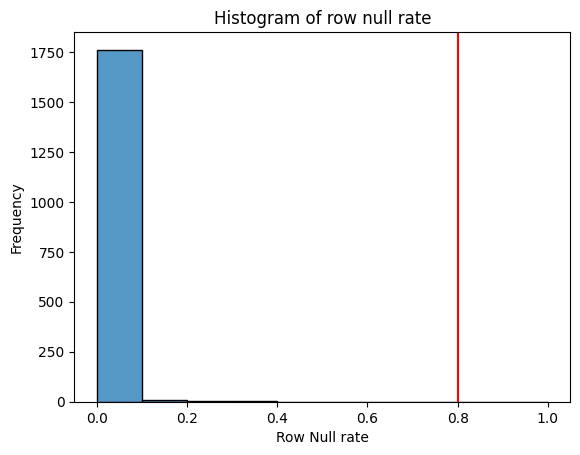

In [31]:
# Create the array
my_array = np.random.rand(1000)

# Create the bins
bins = np.arange(0, 1.1, 0.1)

# Create a figure and axes
fig, ax = plt.subplots()

# Plot the histogram
sns.histplot(dummy, bins=bins,kde=False,ax=ax)

ax.axvline(x=0.8, color='r')

# Add labels and title
ax.set_xlabel('Row Null rate')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of row null rate')

# Show the plot
plt.show()

Now i need to develop a function to calculate any rows greater than 80% null rates in each file

In [33]:
df_1 = df.isnull().sum(axis=1)/len(df.columns)
df_1

0       0.000000
1       0.260870
2       0.000000
3       0.065217
4       0.000000
          ...   
1771    0.021739
1772    0.021739
1773    0.065217
1774    0.021739
1775    0.021739
Length: 1776, dtype: float64

In [40]:
def get_indexes(series):
    mask = series > 0.8
    return np.where(mask)[0].tolist()


indexes = get_indexes(df_1)
print(indexes)

[]


In [50]:
output = []
for file in csv_files:
    # read file as dataframe
    df = pd.read_csv(file)
    # get the row rate series
    row_rate = df.isnull().sum(axis=1)/len(df.columns)
    # 
    s = get_indexes(row_rate)

    if len(s) != 0:
        output.append(file)



/var/folders/g9/k6qb06vj6177d3v18ms7g0tw0000gn/T/ipykernel_39643/355319163.py:4: DtypeWarning: Columns (17,20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)
/var/folders/g9/k6qb06vj6177d3v18ms7g0tw0000gn/T/ipykernel_39643/355319163.py:4: DtypeWarning: Columns (8,10,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)
/var/folders/g9/k6qb06vj6177d3v18ms7g0tw0000gn/T/ipykernel_39643/355319163.py:4: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)
/var/folders/g9/k6qb06vj6177d3v18ms7g0tw0000gn/T/ipykernel_39643/355319163.py:4: DtypeWarning: Columns (4,6,7,8,9,10,11,12,13,15,16,17,18,21,23,24,25,26,27,28,29,30,31,32) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)


In [51]:
output

['../rawdata/mimic2-iaccd/1.0/aline-mimic-ii-master/Data_Analysis/R/hufeng/rnd12.csv',
 '../rawdata/mimic2-iaccd/1.0/aline-mimic-ii-master/Data_Analysis/R/hufeng/rnd13.csv',
 '../rawdata/mimic2-iaccd/1.0/aline-mimic-ii-master/Data_Analysis/R/hufeng/rnd14.csv',
 '../rawdata/mimic2-iaccd/1.0/aline-mimic-ii-master/Data_Analysis/R/hufeng/rnd15.csv',
 '../rawdata/mimic2-iaccd/1.0/aline-mimic-ii-master/Data_Analysis/R/hufeng/rnd17.csv',
 '../rawdata/mimic2-iaccd/1.0/aline-mimic-ii-master/Data_Analysis/R/hufeng/rnd16.csv',
 '../rawdata/mimic2-iaccd/1.0/aline-mimic-ii-master/Data_Analysis/R/hufeng/rnd18.csv',
 '../rawdata/mimic2-iaccd/1.0/aline-mimic-ii-master/Data_Analysis/R/hufeng/rnd19.csv',
 '../rawdata/mimic2-iaccd/1.0/aline-mimic-ii-master/Data_Analysis/R/hufeng/rnd20.csv',
 '../rawdata/mimic-iv-demo/2.2/hosp/emar_detail.csv.gz']